# Text Analytics  

Natural Language Processing is a vast subject requiring extensive study.  The field is changing quickly, and advancements are being made at an extraordinary speed.

We will cover key concepts at a high level to get you started on a journey of exploration!

## Some basic ideas
### Text as data
Data often comes to us as text.  It contains extremely useful information,  and often what text can tell us,  numerical quantities cannot.  Yet we are challenged to effectively use text data in models,  because models can only accept numbers as inputs.  

Vectorizing text is the process of transforming text into numeric tensors.  

In this discussion on text analytics, we will focus on transforming text into numbers, and using it for modeling.

The first challenge text poses is that it needs to be converted to numbers, ie vectorized, before any ML/AI can consume them.

One way to vectorize text is to use one-hot encoding.

Consider the word list below.

| index | word | 
|--|--|
| 1 | [UNK] | 
| 2 | i | 
| 3 | love | 
| 4 | this | 
| 5 | and | 
| 6 | company | 
| 7 | living | 
| 8 | brooklyn | 
| 9 | new york | 
| 10 | sports | 
| 11 | politics | 
| 12 | entertainment | 
| 13 | in | 
| 14 | theater | 
| 15 | cinema | 
| 16 | travel | 
| 17 | we | 
| 18 | tomorrow | 
| 19 | believe | 
| 20 | the | 

Using the above, the word ‘company’ would be expressed as:  
 >   [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

But how did we come up with this dictionary, and how would we encode an entire sentence?




### Vectorizing Sentences as Sequences:
We build a dictionary of words from our corpus (corpus means a collection of documents), and call it the word index.  We then use the word indexes to create a sequence vector by replacing each word in our given sentence by its corresponding word index number.  

So "I love sports!" =  [2, 3, 10]  (Sentence 1)    

And "I love living in Brooklyn and in New York and some sports" = [2, 3, 7, 13, 8, 5, 13, 9, 5, 1, 10] (Sentence 2)  

### Vectorizing with Document Term Matrices:  
This can be expressed as a matrix, with the word index numbers along one axis, and the 'documents' along the other.  This is called a ‘Document Term Matrix’, for example, a document term matrix for our hypothetical sentences would look as below:  


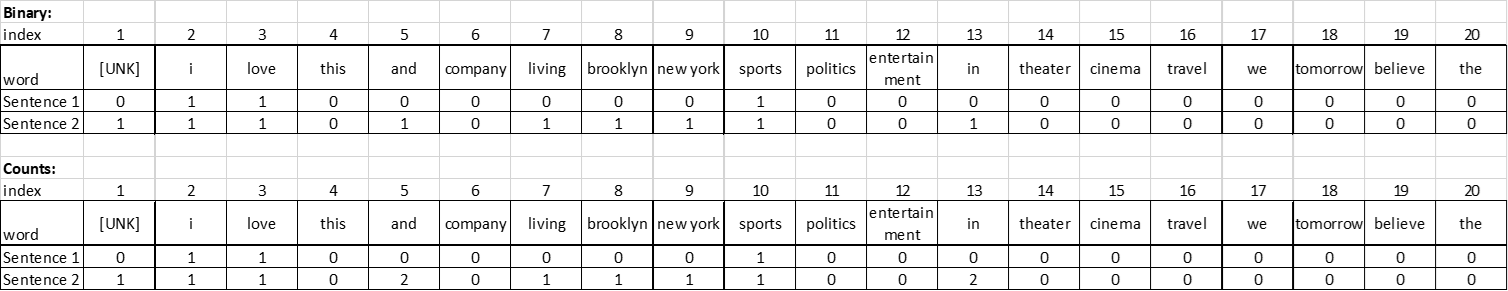

Now this matrix can be used as a numeric input into our modeling exercises.  

### Tokenization  

Think about what we did:  
  - We ignored case  
  - We ignored punctuation  
  - We broke up our sentences into words. This is called tokenization.  The words are our ‘tokens’  

There are other ways to tokenize.  
  - We could have broken the sentence into characters.
  - We could have used groups of 2 words as one token. So ‘I love sports’ would have the tokens ‘I love’ and ‘love sports’.  
  - We could have used 3 words as a token, so ‘I love living in Brooklyn’ would have the tokens ‘I love living’, ‘love living in’, and ‘living in Brooklyn’.  

### N-grams  
Using multiple words as a token is called the n-gram approach, where n is the number of words.  
  - Unigram: When each word is considered a token (most common approach)  
  - Bigram: Two consecutive words taken together  
  - Trigram: Three consecutive words taken together  
  
Bigrams, Trigrams etc help consider words together.
When building the document term matrices, we ignored the word order, and treated each sentence as a set of words.  This is called the ‘bag-of-words’ approach.


### TF-IDF  

**TF-IDF = Term Frequency - Inverse Document Frequency**  
Generally when creating a Document Term Matrix, we would consider the count of times a word appears in a document.  
However, not all words are equally important.  Words that appear in all documents are likely less important than words that are unique to a single or a few documents.  
Stopwords, such as of, and, the, is etc, would likely appear in all documents, and need to be weighted less.  

TF-IDF is the product of term frequency, and the inverse of the document frequency (ie, the count of documents in which the word appears).  

$TFIDF = TF × IDF$, where:   

$TF = Term Frequency$, the number of times a term appears in a document, and

$IDF = idf(t)=log((1+n)/(1+t)+1$
where $n$ is the total number of documents in the document set, and $t$ is the number of documents in the document set that contain term 
Intuitively, the above will have the effect of reducing the impact of common words on our document term matrix

Source: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

### Summing it up   
Machine learning models, including deep learning, can only process numeric vectors (tensors).  Vectorizing text is the process of converting text into numeric tensors. Text vectorization processes come in many shapes and form, but they all follow the same template:  

1. First, you pre-process or standardize the text to make it easier to process, for instance by converting it to lowercase or removing punctuation.  
2. Then you split the text into units (called "tokens"), such as characters, words, or groups of words. This is called tokenization.  
3. Finally, you convert each such token into a numerical vector. This almost always involves first indexing all tokens present in the data (the vocabulary, or the dictionary).  You can do this:  

   - using the bag-of-words approach we saw earlier (using a document-term-matrix), or 
   - using word embeddings that attempt to capture the semantic meaning of the text.  


(Source: Adapted from Deep Learning with Python, François Chollet, Manning Publications)

**Next, some library imports**  

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

***
## Text Pre-Processing  
**Common pre-processing tasks:**

Stemming and lemmatization are rarely used anymore as transformers create tokens of sub-words that take care of thia automatically.

  - Stop-word removal – Remove common words such as and, of, the, is etc.
  - Lowercasing all text
  - Removing punctuation
  - Stemming – removing the ends of words as to end up with a common root
  - Lemmatization – looking up words to their true root 

Let us look at some Text Pre-Processing:  

**More library imports** 

In [245]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [246]:
# Needed for NYU Jupyterhub

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [247]:
sentence = "I love living in Brooklyn!!"

**Remove punctuation**

In [248]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [249]:
for punctuation in string.punctuation:
    sentence = sentence.replace(punctuation,"")

print(sentence)

I love living in Brooklyn


**Convert to lowercase and remove stopwords**

In [250]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'are', 'she', 'm', 'through', 'my', 'their', 'didn', 'under', 'him', 'will', "mustn't", 'on', 'until', 're', "hasn't", 'mightn', 'her', 'mustn', 'his', "should've", 'the', "you've", 'at', "needn't", 'we', "you're", 'does', 'from', 'over', 'such', 'again', "hadn't", 'isn', 'yourself', 'own', 'because', 'by', 'been', 'few', 'll', "don't", 'me', 'do', 'too', 'between', 'other', 'as', 'hasn', 'in', 'for', "she's", 'couldn', 'was', 'had', 'when', 'some', 'y', 'but', 'weren', "wouldn't", 'once', 'wasn', 'd', 'being', 'than', 'further', 'not', 'so', "aren't", 'only', 'herself', 'more', 'have', 'himself', 'whom', 'most', 'your', "couldn't", "you'll", 'with', 'that', 'won', 'then', 'into', "didn't", 'needn', 'after', 'what', 'you', 'this', "wasn't", 'ma', 'our', 'how', 'i', 'yours', 'just', "you'd", 'off', "haven't", 'he', 'am', 'it', 'out', 'all', "shouldn't", 'no', 'wouldn', 'which', 've', 'each', 'up', 'there', 'who', 'where', 'any', "weren't", 'be', 'should', "mightn't", 'these', 'ourselve

In [251]:
print([i for i in sentence.lower().split() if i not in stopwords])


['love', 'living', 'brooklyn']


### Code for Tokenizing with scikit-learn
**Be careful with sklearn's tokenizer.** It ignores 1 character words such as I, a etc.  

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [233]:
text = ["I love living in in brooklyn Brooklyn", "I am not sure if I enjoy politics"]
vectorizer = CountVectorizer()


# Create document term matrix
doc_term_matrix = vectorizer.fit_transform(text).todense()
doc_term_matrix

matrix([[0, 2, 0, 0, 2, 1, 1, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 1, 1, 1]], dtype=int64)

In [234]:
pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names_out())

,am,brooklyn,enjoy,if,in,living,love,not,politics,sure
0,0,2,0,0,2,1,1,0,0,0
1,1,0,1,1,0,0,0,1,1,1


In [229]:
vectorizer.get_feature_names_out()

array(['am', 'brooklyn', 'enjoy', 'if', 'in', 'living', 'love', 'not',
       'politics', 'sure'], dtype=object)

In [230]:
vectorizer.stop_words_

set()

In [221]:
text = ["I love living in Brooklyn", "I am not sure if I enjoy politics"]

# TF-IDF based vectorizer
vectorizer = TfidfVectorizer()

# Create document term matrix
doc_term_matrix = vectorizer.fit_transform(text).todense()
doc_term_matrix

matrix([[0.        , 0.5       , 0.        , 0.        , 0.5       ,
         0.5       , 0.5       , 0.        , 0.        , 0.        ],
        [0.40824829, 0.        , 0.40824829, 0.40824829, 0.        ,
         0.        , 0.        , 0.40824829, 0.40824829, 0.40824829]])

In [222]:
pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names_out())

,am,brooklyn,enjoy,if,in,living,love,not,politics,sure
0,0.000000,0.5,0.000000,0.000000,0.5,0.5,0.5,0.000000,0.000000,0.000000
1,0.408248,0.0,0.408248,0.408248,0.0,0.0,0.0,0.408248,0.408248,0.408248


### Code for Tokenizing and Creating Sequences with Tensorflow

In [253]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = ["I love living in Brooklyn", "I am not sure if I enjoy politics"]

tokenizer = Tokenizer(oov_token='[UNK]', num_words=None)
tokenizer.fit_on_texts(text)   


In [254]:
# This step transforms each text in texts to a sequence of integers. 
# It takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.   

seq = tokenizer.texts_to_sequences(['love I living Brooklyn in state'])  # note 'state' is not in vocabulary
seq

[[3, 2, 4, 6, 5, 1]]

In [255]:
# The dictionary
tokenizer.word_index

{'[UNK]': 1,
 'i': 2,
 'love': 3,
 'living': 4,
 'in': 5,
 'brooklyn': 6,
 'am': 7,
 'not': 8,
 'sure': 9,
 'if': 10,
 'enjoy': 11,
 'politics': 12}

**Document Term Matrix - Counts**

In [12]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='count')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


**Document Term Matrix - Binary**

In [13]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='binary')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


**Document Term Matrix - TF-IDF**

In [14]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='tfidf')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,0.510826,0.693147,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.864903,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


**Document Term Matrix based - Frequency**

In [15]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='freq')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,0.20,0.2,0.2,0.2,0.2,0.000,0.000,0.000,0.000,0.000,0.000
1,0.0,0.25,0.0,0.0,0.0,0.0,0.125,0.125,0.125,0.125,0.125,0.125


In [16]:
tokenizer.texts_to_matrix(text, mode='binary')

array([[0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [17]:
new_text = ['There was a person living in Brooklyn', 'I love and enjoy dancing']
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='count')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='binary')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Word frequency
pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False)

,0,1
0,i,3
1,love,1
2,living,1
3,in,1
4,brooklyn,1
5,am,1
6,not,1
7,sure,1
8,if,1
9,enjoy,1


In [20]:
# How many docs does the word appear in?
tokenizer.word_docs

defaultdict(int,
            {'brooklyn': 1,
             'living': 1,
             'love': 1,
             'i': 2,
             'in': 1,
             'am': 1,
             'politics': 1,
             'if': 1,
             'sure': 1,
             'not': 1,
             'enjoy': 1})

In [21]:
# How many documents in the corpus
tokenizer.document_count

2

In [22]:
tokenizer.word_index.keys()

dict_keys(['[UNK]', 'i', 'love', 'living', 'in', 'brooklyn', 'am', 'not', 'sure', 'if', 'enjoy', 'politics'])

In [23]:
len(tokenizer.word_index)

12

**Convert text to sequences based on the word index**

In [24]:
seq = tokenizer.texts_to_sequences(new_text)
seq

[[1, 1, 1, 1, 4, 5, 6], [2, 3, 1, 11, 1]]

In [25]:
from tensorflow.keras.utils import pad_sequences

seq = pad_sequences(seq, maxlen = 8)
seq

array([[ 0,  1,  1,  1,  1,  4,  5,  6],
       [ 0,  0,  0,  2,  3,  1, 11,  1]])

In [26]:
depth = len(tokenizer.word_index)

tf.one_hot(seq, depth=depth)

<tf.Tensor: shape=(2, 8, 12), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)>

In [27]:
text2 = ['manning pub adt ersa']
# tokenizer.fit_on_texts(text2)  

In [28]:
tokenizer.texts_to_matrix(text2, mode = 'binary')  

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
tokenizer.texts_to_sequences(text2)

[[1, 1, 1, 1]]

## Wordcloud  
Wordclouds are visual representations of text data.  They work by arranging words in a shape so that words with the highest frequency appear in a larger font.  They are not particularly useful as an analytical tool, except as a visual device to draw attention to key themes.  

Creating wordclouds using Python is relatively simple.  Example below.  


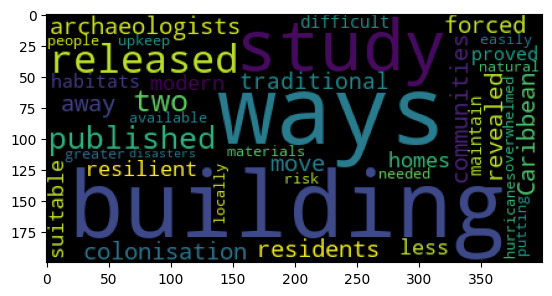

In [30]:
some_text = '''A study released in 2020, published by two 
archaeologists, revealed how colonisation forced 
residents in Caribbean communities to move away 
from traditional and resilient ways of building 
homes to more modern but less suitable ways. These 
habitats have proved to be more difficult to 
maintain, with the materials needed for upkeep not 
locally available, and the buildings easily 
overwhelmed by hurricanes, putting people at 
greater risk during natural disasters.'''

from wordcloud import WordCloud
plt.imshow(WordCloud().generate_from_text(some_text))

***
## Topic Modeling

  - Topic modeling, in essence, is a clustering technique to group similar documents together in a single cluster.
  - Topic modeling can be used to find themes across a large corpus of documents as each cluster can be expected to represent a certain theme.
  - The analyst has to specify the number of ‘topics’ (or clusters) to identify.
  - For each cluster that is identified by topic modeling, top words that relate to that cluster can also be reviewed.
  - In practice however, the themes are not always obvious, and trial and error is an extensive part of the topic modeling process.  
  - Topic modeling can be extremely helpful in starting to get to grips with a large data set.
  - Topic Modeling is not based on neural networks, but instead on linear algebra relating to matrix decomposition of the document term matrix for the corpus.
  - Creating the document term matrix is the first step for performing topic modeling.  There are several decisions for the analyst to consider when building the document term matrix.
    - Whether to use a count based or TF-IDF based vectorization for building the document term matrix,
    - Whether to use words, or n-grams, and if n-grams, then what should n be
  - When performing matrix decomposition, again there are decisions to be made around the mathematical technique to use.  The most common ones are:
    - NMF: Non-negative Matrix Factorization
    - LDA: LatentDirichletAllocation

**Matrix Factorization** 
Matrix factorization of the document term matrix gives us two matrices, one of which identifies each document in our list as belonging to a particular topic, and the other gives us the top terms in every topic.  

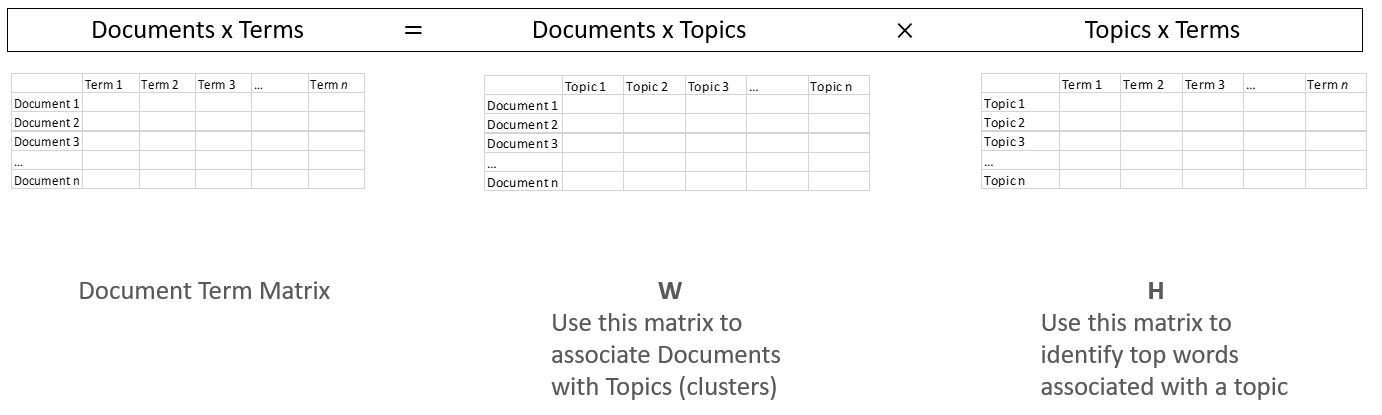


**Topic Modeling in Action**  
Steps:  
1. Load the text data.  Every tweet is a ‘document’, as an entry in a list.
2. Vectorize and create a document term matrix based on count (or TF-IDF).  If required, remove stopwords as part of pre-processing options.  Specify n for if n-grams are to be used instead of words.
3. Pick the model – NMF or LDA – and apply to the document term matrix from step 2.  
  - More information on NMF at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
  - More information on LDA at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 
4. Extract and use the W and H matrices to determine topics and terms.


Load the file 'Corona_NLP_train.csv’ for Corona related tweets, using the column ‘Original Tweet’ as the document corpus.
Cluster the tweets into 10 different topics using both NMF and LDA, and examine the results.

In [256]:
# Regular library imports

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [257]:
# Read the data
# Adapted from source: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

text = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

text = text.sample(10000) # Let us limit to 10000 random articles for illustration purposes

print('text.shape', text.shape)


text.shape (10000, 6)


In [258]:
# Read stopwords from file

custom_stop_words = []
file = open(file = "stopwords.txt", mode = 'r')
custom_stop_words = file.read().split('\n')


In [259]:
custom_stop_words

['thereof',
 'az',
 'self',
 'ii',
 'apart',
 'again',
 'become',
 'run',
 "why's",
 'indicates',
 'otherwise',
 'couldnt',
 'ys',
 'thus',
 'ej',
 'end',
 'often',
 'say',
 'becomes',
 'consequently',
 'overall',
 'cl',
 'index',
 'took',
 'beforehand',
 'considering',
 'theyre',
 "i'd",
 'looks',
 'fn',
 'over',
 'ra',
 'hereby',
 'similar',
 'dj',
 'lc',
 'los',
 'ip',
 'oj',
 'om',
 'really',
 'out',
 'thin',
 'zi',
 'could',
 'all',
 'bn',
 'brief',
 'sorry',
 'mo',
 'n',
 'nine',
 'stop',
 'ih',
 'asking',
 'n2',
 'four',
 'willing',
 'itd',
 'L',
 'after',
 'pas',
 'http',
 'along',
 'allow',
 'help',
 'ref',
 'knows',
 'R',
 "i'm",
 'name',
 'whereafter',
 'J',
 'ma',
 'H',
 'believe',
 'ge',
 'gave',
 'viz',
 'another',
 'go',
 'at',
 "isn't",
 'vo',
 'novel',
 'wouldnt',
 'than',
 'l',
 'ignored',
 'between',
 'ke',
 'they',
 'wouldn',
 'but',
 'da',
 'ga',
 'lately',
 'similarly',
 'rm',
 'pq',
 'b3',
 'uk',
 'hi',
 'briefly',
 'b1',
 'ct',
 'hasnt',
 'shouldn',
 "there'll",

**Next, we do topic modeling on the tweets.  The next few cells have the code to do this.**  

It is a lot of code, but let us just take a step back from the code to think about what it does.  

We need to provide it three inputs: 
 - the text,  
 - the number of topics we want identified, and  
 - the value of n for our ngrams.  

Once done, the code below will create two dataframes:  

   - words_in_topics_df - top_n_words per topic  
   - topic_for_doc_df - topic to which a document is identified  

Additional outputs of interest  
- vocab = This is the dict from which you can pull the words, eg vocab['ocean']  
- terms = Just the list equivalent of vocab, indexed in the same order  
- term_frequency_table = dataframe with the frequency of terms  
- doc_term_matrix = Document term matrix  (doc_term_matrix = W x H)  
- W = This matrix has docs as rows and num_topics as columns  
- H = This matrix has num_topics as rows and vocab as columns  

    

In [260]:
# Specify inputs
# Input incoming text as a list called raw_documents

raw_documents= list(text['OriginalTweet'].values.astype('U'))
max_features = 5000 # vocab size
num_topics = 10
ngram = 2 # 2 for bigrams, 3 for trigrams etc

In [261]:
len(raw_documents)

10000

In [264]:
raw_documents[3350]

'Nevada To report scams or consumer fraud related to COVID 19 like  coordinated increases in prices for goods or services you can file a complaint with s office at or call 2 hot lines 702 486 3132 or 888 434 9989'

In [265]:
# use count based vectorizer from sklearn

# vectorizer = CountVectorizer(stop_words = custom_stop_words, min_df = 2, analyzer='word', ngram_range=(ngram, ngram))

# or use TF-IDF based vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features= max_features, stop_words=custom_stop_words, analyzer='word', ngram_range=(ngram, ngram))

# Create document term matrix
doc_term_matrix = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix in variable doc_term_matrix\n" % (doc_term_matrix.shape[0], doc_term_matrix.shape[1]) )


vocab = vectorizer.vocabulary_ #This is the dict from which you can pull the words, eg vocab['ocean']
terms = vectorizer.get_feature_names_out() #Just the list equivalent of vocab, indexed in the same order
print("Vocabulary has %d distinct terms, examples below " % len(terms))
print(terms[500:550], '\n')

term_frequency_table = pd.DataFrame({'term': terms,'freq': list(np.array(doc_term_matrix.sum(axis=0)).reshape(-1))})
term_frequency_table = term_frequency_table.sort_values(by='freq', ascending=False).reset_index()

freq_df = pd.DataFrame(doc_term_matrix.todense(), columns = terms)
freq_df = freq_df.sum(axis=0)
freq_df = freq_df.sort_values(ascending=False)

Created 10000 X 5000 document-term matrix in variable doc_term_matrix

Vocabulary has 5000 distinct terms, examples below 
['close store' 'close stores' 'close weeks' 'closed covid'
 'closed government' 'closed retail' 'closely suppliers' 'closes stores'
 'closing retail' 'closing stores' 'closings destroy' 'closures https'
 'coffee shops' 'coles woolworths' 'collapse oil' 'combat coronavirus'
 'combat covid' 'combat spread' 'combating covid' 'combined 100'
 'comedy hotchick' 'coming contact' 'coming days' 'coming months'
 'coming weeks' 'commerce platform' 'commerce prices' 'commerce sales'
 'commission prices' 'commodities coronavirus' 'commodities including'
 'commodity prices' 'common household' 'common sense' 'communities covid'
 'community amp' 'community covid' 'community food' 'community https'
 'community quarantine' 'community spirit' 'community spread'
 'companies coronavirus' 'companies https' 'companies offering'
 'companies produce' 'companies raise' 'companies set' 'comp

In [266]:
# create the model
# Pick between NMF or LDA methods (don't know what they are, try whichever gives better results)

# Use NMF
# model = NMF( init="nndsvd", n_components=num_topics ) 

# Use LDA
model = LatentDirichletAllocation(n_components=num_topics, learning_method='online') 
    
# apply the model and extract the two factor matrices
W = model.fit_transform( doc_term_matrix ) #This matrix has docs as rows and k-topics as columns
H = model.components_ #This matrix has k-topics as rows and vocab as columns
print('Shape of W is', W.shape, 'docs as rows and', num_topics, 'topics as columns. First row below')
print(W[0].round(1))
print('\nShape of H is', H.shape, num_topics, 'topics as rows and vocab as columns. First row below')
print(H[0].round(1))

Shape of W is (10000, 10) docs as rows and 10 topics as columns. First row below
[0.  0.  0.  0.  0.6 0.  0.  0.  0.  0. ]

Shape of H is (10, 5000) 10 topics as rows and vocab as columns. First row below
[0.1 0.1 0.1 ... 0.1 0.1 0.1]


In [267]:
# Check which document belongs to which topic, and print value_count
topic_for_doc_df = pd.DataFrame(columns = ['article', 'topic', 'value'])
for i in range(W.shape[0]):
    a = W[i] 
    b = np.argsort(a)[::-1]
    temp_df = pd.DataFrame({'article': [i], 'topic':['Topic_'+str(b[0])], 'value': [a[b[0]]]})
    topic_for_doc_df = pd.concat([topic_for_doc_df, temp_df])

top_docs_for_topic_df = pd.DataFrame(columns = ['topic', 'doc_number', 'weight'])    
for i in range(W.shape[1]):
    topic = i
    temp_df = pd.DataFrame({'topic': ['Topic_'+str(i) for x in range(W.shape[0])], 
                            'doc_number':  list(range(W.shape[0])), 
                            'weight': list(W[:,i])})
    temp_df = temp_df.sort_values(by=['topic', 'weight'], ascending=[True, False])
    top_docs_for_topic_df = pd.concat([top_docs_for_topic_df, temp_df])
# Add text to the top_docs dataframe as a new column
top_docs_for_topic_df['text']=[raw_documents[i] for i in list(top_docs_for_topic_df.doc_number)] 

C:\Users\user\AppData\Local\Temp\ipykernel_23804\3025426810.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  topic_for_doc_df = pd.concat([topic_for_doc_df, temp_df])
C:\Users\user\AppData\Local\Temp\ipykernel_23804\3025426810.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_docs_for_topic_df = pd.concat([top_docs_for_topic_df, temp_df])


In [268]:
# Print top two docs for each topic
print('\nTop documents for each topic')
(top_docs_for_topic_df.groupby('topic').head(2))


Top documents for each topic


,topic,doc_number,weight,text
1610,Topic_0,1610,0.798085,@alessi0p We're working closely with suppliers...
2795,Topic_0,2795,0.798085,@wearyrabbit Hi there - We're working closely ...
3038,Topic_1,3038,0.764399,Lockdowns and panic food buying due to the #Co...
434,Topic_1,434,0.761876,A senior economist from the United Nation's (U...
2960,Topic_2,2960,0.783764,Concerned about she tweeted on March 10 Re...
6334,Topic_2,6334,0.783764,Concerned about Remember this The consumer is ...
353,Topic_3,353,0.791006,#CoronaCrisis #stopstockpiling #StopPanicBuyin...
662,Topic_3,662,0.790957,#panicbuyinguk #CoronaCrisis #stopstockpiling ...
3137,Topic_4,3137,0.758527,@PusaterisFoods Absolutely disgusted how you c...
7775,Topic_4,7775,0.757125,Make sure to wash your hands often &amp; corre...


In [270]:
print('Topic number and counts of documents against each:')
(topic_for_doc_df.topic.value_counts())

Topic number and counts of documents against each:


topic
Topic_9    1778
Topic_1    1202
Topic_4    1161
Topic_3    1008
Topic_8     864
Topic_0     826
Topic_5     808
Topic_2     795
Topic_7     785
Topic_6     773
Name: count, dtype: int64

In [271]:
# Create dataframe with top-10 words for each topic
top_n_words = 10

words_in_topics_df = pd.DataFrame(columns = ['topic', 'words', 'freq'])
for i in range(H.shape[0]):
    a = H[i] 
    b = np.argsort(a)[::-1]
    np.array(b[:top_n_words])
    words = [terms[i] for i in b[:top_n_words]]
    freq = [a[i] for i in b[:top_n_words]]
    temp_df = pd.DataFrame({'topic':'Topic_'+str(i), 'words': words, 'freq': freq})
    words_in_topics_df = pd.concat([words_in_topics_df, temp_df])

print('\n')
print('Top', top_n_words, 'words dataframe with weights')
(words_in_topics_df.head(10))



Top 10 words dataframe with weights


C:\Users\user\AppData\Local\Temp\ipykernel_23804\4023544607.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  words_in_topics_df = pd.concat([words_in_topics_df, temp_df])


,topic,words,freq
0,Topic_0,supermarket shelves,54.715233
1,Topic_0,stock food,31.922033
2,Topic_0,retail store,23.295509
3,Topic_0,covid2019 https,21.792888
4,Topic_0,supermarket https,16.621298
5,Topic_0,work grocery,15.070641
6,Topic_0,panic buying,14.336548
7,Topic_0,grocery store,14.250838
8,Topic_0,store closures,13.527987
9,Topic_0,coronavirus covid2019,13.359654


In [272]:
# print as list
print('\nSame list as above as a list')
words_in_topics_list = words_in_topics_df.groupby('topic')['words'].apply(list)
lala =[]
for i in range(len(words_in_topics_list)):
    a = [list(words_in_topics_list.index)[i]]
    b = words_in_topics_list[i]
    lala = lala + [a+b]
    print(a + b) 
    
    


Same list as above as a list
['Topic_0', 'supermarket shelves', 'stock food', 'retail store', 'covid2019 https', 'supermarket https', 'work grocery', 'panic buying', 'grocery store', 'store closures', 'coronavirus covid2019']
['Topic_1', 'coronavirus covid19', 'panic buying', 'covid pandemic', 'covid19 https', 'coronavirus pandemic', 'coronavirus covid', 'covid_19 https', 'covid coronavirus', 'pandemic https', 'covid crisis']
['Topic_2', 'coronavirus toiletpaper', 'covid outbreak', 'amid covid', 'toiletpaper https', 'hand sanitizers', 'outbreak https', 'online https', 'online shopping', 'increased demand', 'long term']
['Topic_3', 'toilet paper', 'oil prices', 'coronavirus outbreak', 'supply chain', 'coronavirus covid_19', 'local supermarket', 'toiletpaper coronavirus', 'food supply', 'covid_19 coronavirus', 'coronavirus https']
['Topic_4', 'coronavirus https', 'hand sanitizer', 'covid19 coronavirus', 'grocery store', 'store workers', 'social distancing', 'price gouging', 'grocery sto

C:\Users\user\AppData\Local\Temp\ipykernel_23804\1593796434.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = words_in_topics_list[i]


In [42]:
# Top terms
print('\nTop 10 most numerous terms:')
term_frequency_table.head(10)


Top 10 most numerous terms:


,index,term,freq
0,1959,grocery store,353.660819
1,759,coronavirus https,172.838823
2,1985,hand sanitizer,141.660019
3,2678,online shopping,130.792649
4,722,coronavirus covid19,120.250304
5,4584,toilet paper,113.301746
6,1075,covid19 coronavirus,105.948951
7,2771,panic buying,98.477036
8,1014,covid pandemic,83.931306
9,2642,oil prices,81.965440


***
## Applying ML and AI Algorithms to Text Data

We will use movie reviews as an example to build a model to predict whether the review is positive or negative.  The data already has human assigned labels, so we can try to see if our models can get close to human level performance.

### Movie Review Classification with XGBoost

Let us get some text data to play with.  We will use the IMDB movie review dataset which has 50,000 movie reviews, classified as positive or negative.  

We load the data, and look at some random entries.  

There are 25k positive, and 25k negative reviews.

In [273]:
# Library imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer


In [274]:
# Read the data, create the X and y variables, and look at the dataframe

df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [276]:
# let us look at two random reviews

x = np.random.randint(0, len(df))
print(df['sentiment'][x:x+2])
list(df['review'][x:x+2])

36380    positive
36381    positive
Name: sentiment, dtype: object


['The entire movie, an artful adaptation of one of Joyce\'s "Dubliners" stories, takes place on the night of January 6 (Epiphany), 1906. Most of the film takes place at an annual party given by three spinsters (two sisters and their niece), where a group of upper-class Dubliners gather for an evening of music, recitations and dinner. While there is very little plot per se, the interaction and conversation among the group reveals much about Dublin in the early 20th century when the stirrings for independence were just beginning. The cast, all talented Irish stage actors with the exception of Anjelica Huston, are universally wonderful, and one actually feels he is a guest at the gathering himself. The poignant final scene, between Ms. Huston and the amazing Donal McCann, reveals much about the marriage of the characters. There is poignancy mixed with humor and insight, and for those who like quiet, thoughtful movies, "The Dead" is highly recommended. My wife is from Dublin, we make a rit

In [277]:
X

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [278]:
# We do the train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [279]:
X_train

28363    It's too bad these guys, the so-called judges,...
23683    This Showtime movie really deserves a far bett...
49804    ***May Contain Spoilers*** OK, it wasn't exact...
4474     Anyone who will pay to see Troma movies knows,...
10099    You would probably get something like this. I'...
                               ...                        
47400    No one goes to a movie like The Hills Have Eye...
6357     I have to admit that this "re-imagining" of th...
22583    This is a fantastic film. The acting is some o...
48359    You know the old saw about a train wreck? The ...
34584    Mike Judge's Idiocracy is an interesting film,...
Name: review, Length: 40000, dtype: object

**Approach**  
Extract a vocabulary from the training text, and give each word a number index.  

Take the top 2000 words from this vocab, and convert all tweets into a numerical vector by putting a "1" in the position for a word if that word appears in the tweet.  Words not in the vocab get mapped to [UNK]=1. 

Construct a Document Term Matrix (which can be binary, or counts, or TFIDF).  This is the array we use for X.  


In [280]:
# We tokenize the text based on the training data

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='[UNK]', num_words=2000)

tokenizer.fit_on_texts(X_train)   

In [281]:
# let us look around the tokenized data


# Word frequency from the dictionary (tokenizer.word_counts())
print('Top words\n', pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False).head(20).reset_index(drop=True))


# How many documents in the corpus
print('\nHow many documents in the corpus?', tokenizer.document_count)

      
print('Total unique words', len(tokenizer.word_index))

Top words
         0       1
0     the  533783
1     and  260556
2       a  258441
3      of  231887
4      to  215212
5      is  169620
6      br  161722
7      in  149830
8      it  125564
9       i  124128
10   this  120884
11   that  109962
12    was   76558
13     as   73657
14    for   70175
15   with   70113
16  movie   69713
17    but   66874
18   film   62502
19     on   54445

How many documents in the corpus? 40000
Total unique words 112513


In [50]:
# We can also look at the word_index
# But it is very long, and we will not 
# print(tokenizer.word_index)

# Let us print the first 20
list(tokenizer.word_index.items())[:20]

[('[UNK]', 1),
 ('the', 2),
 ('and', 3),
 ('a', 4),
 ('of', 5),
 ('to', 6),
 ('is', 7),
 ('br', 8),
 ('in', 9),
 ('it', 10),
 ('i', 11),
 ('this', 12),
 ('that', 13),
 ('was', 14),
 ('as', 15),
 ('for', 16),
 ('with', 17),
 ('movie', 18),
 ('but', 19),
 ('film', 20)]

In [282]:
# Next, we convert the tokens to a document term matrix
X_train = tokenizer.texts_to_matrix(X_train, mode='binary')
X_test = tokenizer.texts_to_matrix(X_test, mode='binary')

In [283]:
print('X_train.shape', X_train.shape)
X_train[198:202]

X_train.shape (40000, 2000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [53]:
print('y_train.shape', y_train.shape)
y_train[198:202]

y_train.shape (40000,)


31123    positive
36156    negative
6229     negative
47574    positive
Name: sentiment, dtype: object

In [284]:
y_train

28363    negative
23683    positive
49804    positive
4474     negative
10099    negative
           ...   
47400    negative
6357     negative
22583    positive
48359    negative
34584    positive
Name: sentiment, Length: 40000, dtype: object

In [285]:
# let us encode the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array


In [286]:
y_train

array([0, 1, 1, ..., 1, 0, 1])

In [287]:
# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [288]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Checking accuracy on the training set

In [289]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_train)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     19979
           1       0.92      0.94      0.93     20021

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



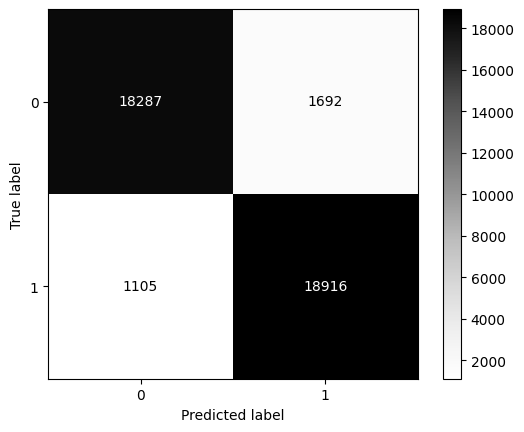

In [290]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_train, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_train, y = y_train, cmap='Greys');

In [291]:
# We can get probability estimates for class membership using XGBoost
model_xgb.predict_proba(X_test).round(3)

array([[0.18 , 0.82 ],
       [0.988, 0.012],
       [0.046, 0.954],
       ...,
       [0.195, 0.805],
       [0.035, 0.965],
       [0.999, 0.001]], dtype=float32)

#### Checking accuracy on the test set

In [292]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      5021
           1       0.85      0.88      0.87      4979

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



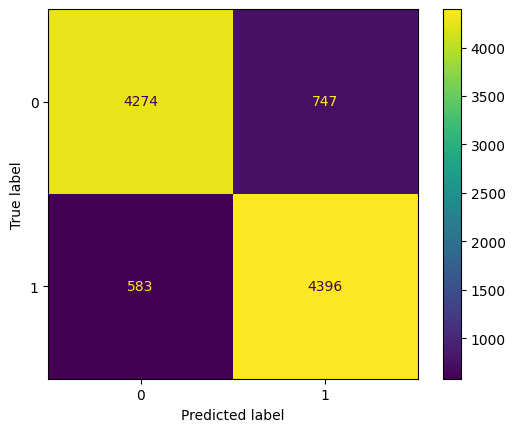

In [293]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_test, y = y_test);

#### Is our model doing any better than a naive classifier?

In [294]:
from sklearn.dummy import DummyClassifier
X = X_train
y = y_train
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.500525

In [295]:
dummy_clf.predict_proba(X_train)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])


**'prior'** and **'most_frequent'** are identical except how probabilities are returned.
`'most_frequent'` returns one-hot probabilities, while `'prior'` returns actual probability values.


In [296]:

from sklearn.dummy import DummyClassifier
X = X_train
y = y_train
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.500525

In [297]:
dummy_clf.predict_proba(X_train)

array([[0.499475, 0.500525],
       [0.499475, 0.500525],
       [0.499475, 0.500525],
       ...,
       [0.499475, 0.500525],
       [0.499475, 0.500525],
       [0.499475, 0.500525]])

In [298]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.503525

In [299]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.496675

***
### Movie Review Classification using a Fully Connected NN

In [69]:

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Input, LSTM
from tensorflow import keras

model = keras.Sequential()

model.add(Input(shape=(X_train.shape[1],))) # INPUT layer
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2001000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4004001 (15.27 MB)
Trainable params: 4004001 (15.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, batch_size=1000, validation_split=0.2, callbacks= [callback])

Epoch 1/15
32/32 [==============================] - 3s 84ms/step - loss: 0.6704 - acc: 0.6641 - val_loss: 0.5588 - val_acc: 0.6923
Epoch 2/15
32/32 [==============================] - 2s 77ms/step - loss: 0.3990 - acc: 0.8306 - val_loss: 0.4279 - val_acc: 0.8163
Epoch 3/15
32/32 [==============================] - 3s 80ms/step - loss: 0.3253 - acc: 0.8645 - val_loss: 0.2960 - val_acc: 0.8771
Epoch 4/15
32/32 [==============================] - 3s 78ms/step - loss: 0.2841 - acc: 0.8818 - val_loss: 0.3151 - val_acc: 0.8681
Epoch 5/15
32/32 [==============================] - 2s 73ms/step - loss: 0.2606 - acc: 0.8924 - val_loss: 0.2934 - val_acc: 0.8777
Epoch 6/15
32/32 [==============================] - 2s 70ms/step - loss: 0.2396 - acc: 0.9010 - val_loss: 0.2887 - val_acc: 0.8746
Epoch 7/15
32/32 [==============================] - 2s 68ms/step - loss: 0.2068 - acc: 0.9196 - val_loss: 0.3307 - val_acc: 0.8704
Epoch 8/15
32/32 [==============================] - 2s 70ms/step - loss: 0.1903 - a

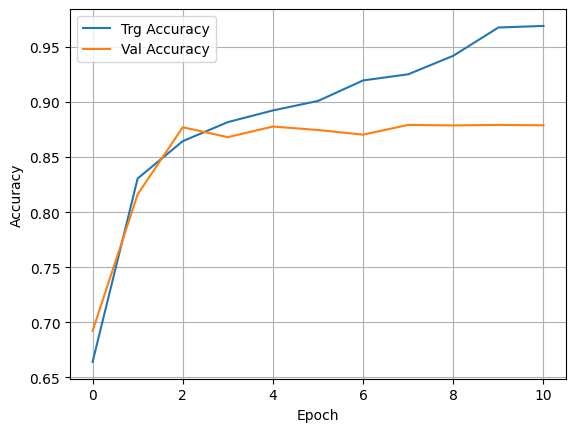

In [71]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [72]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 2s 7ms/step


              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5006
           1       0.87      0.88      0.88      4994

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



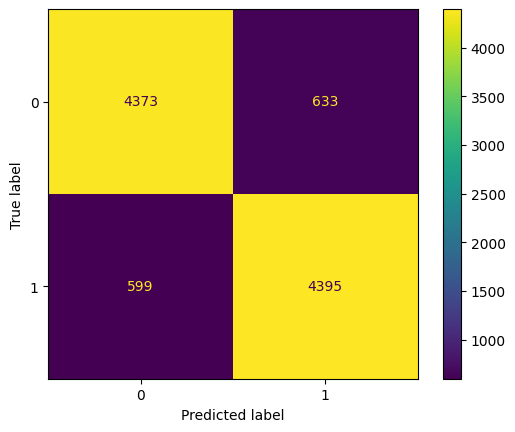

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred);

***
### Movie Review Classification Using an Embedding Layer
**Tensorflow Text Vectorization and LSTM network**  

In [74]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [75]:
max([len(review) for review in X])

13704

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [77]:
X_train

33762    I was pretty young when this came out in the U...
45820    Yet another remake of "Fistful of Dollars", Se...
46366    This is an extremely long movie, which means y...
2755     Probably encouraged by admirers of her much-be...
11571    An enjoyable Batman animated film. Not on par ...
                               ...                        
47318    Bon Voyage is fun for the audience because it ...
9270     As far as the movie goes, it's an OK science f...
8637     Pretty visuals and a lot of fights make not a ...
15675    Yuck. I thought it odd that their ancient book...
11139    Laughed a lot - because it is so incredibly ba...
Name: review, Length: 40000, dtype: object

**Next, we convert our text data into arrays that neural nets can consume.  
These will be used by the several different architectures we will try next.**  

In [78]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

import numpy as np

maxlen=500  # how many words to take from each text
vocab_size=20000 # the size of our vocabulary

# First, we tokenize our training text
tokenizer = Tokenizer(num_words = vocab_size, oov_token='[UNK]')
tokenizer.fit_on_texts(X_train)

# Create sequences and then the X_train vector
sequences_train = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))
X_train = pad_sequences(sequences_train, maxlen = maxlen)

# Same thing for the y_train vector
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_test, maxlen = maxlen)

# let us encode the labels as 0s and 1s instead of positive and negative
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array

# Enumerate Encoded Classes
print('Classes', dict(list(enumerate(le.classes_))), '\n')

# Now our y variable contains numbers.  Let us one-hot them using Label Binarizer
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train) 
# y_test = lb.fit_transform(y_test) 


print('Shape of X_train tensor', X_train.shape)
print('Shape of y_train tensor', y_train.shape)
print('Shape of X_test tensor', X_test.shape)
print('Shape of y_test tensor', y_test.shape)






Found 111932 unique tokens
Classes {0: 'negative', 1: 'positive'} 

Shape of X_train tensor (40000, 500)
Shape of y_train tensor (40000,)
Shape of X_test tensor (10000, 500)
Shape of y_test tensor (10000,)


In [79]:
# We can print the word index if we wish to, 
# but be aware it will be a long list

# print(tokenizer.word_index)

In [80]:
X_train[np.random.randint(0,len(X_train))]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [81]:
pd.DataFrame(X_train).sample(6).reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,7,2,89,431,1023,20,199,107,9,153
1,0,0,0,0,0,0,0,0,0,0,...,8,48,81,820,200,38,10,16,3460,998
2,0,0,0,0,0,0,0,0,0,0,...,690,31,2,128,9,193,11,102,45,14709
3,0,0,0,0,0,0,0,0,0,0,...,1794,638,5,1156,809,1,40,789,12,948
4,0,0,0,0,0,0,0,0,0,0,...,2,13379,245,21,1697,5268,485,39,2573,211
5,10566,172,655,3665,9,946,46,78,2456,1560,...,520,2,1355,359,2,940,3,95,797,940


In [82]:
word_index['the']

2

**Build the model**  

In [83]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout


In [84]:
vocab_size=20000 # vocab size
embedding_dim = 100 # 100 dense vector for each word from Glove
max_len = 350 # using only first 100 words of each review

In [85]:
# In this model, we do not use pre-trained embeddings, but let the machine train the embedding weights too
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim)) 
# Note that vocab_size=20000 (vocab size), 
# embedding_dim = 100 (100 dense vector for each word from Glove), 
# maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2017057 (7.69 MB)
Trainable params: 2017057 (7.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
**Know that the model in the next cell will take over 30 minutes to train!**

In [86]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=1024, validation_split=0.2, callbacks=[callback])


Epoch 1/4
32/32 [==============================] - 136s 4s/step - loss: 0.6908 - acc: 0.5446 - val_loss: 0.6863 - val_acc: 0.6051
Epoch 2/4
32/32 [==============================] - 185s 6s/step - loss: 0.6424 - acc: 0.6558 - val_loss: 0.5378 - val_acc: 0.7380
Epoch 3/4
32/32 [==============================] - 210s 7s/step - loss: 0.5026 - acc: 0.7732 - val_loss: 0.4346 - val_acc: 0.8280
Epoch 4/4
32/32 [==============================] - 208s 7s/step - loss: 0.3993 - acc: 0.8298 - val_loss: 0.4251 - val_acc: 0.8116
CPU times: total: 3min 9s
Wall time: 12min 18s


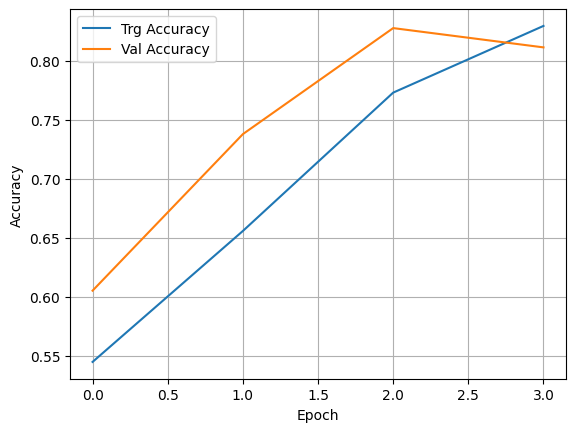

In [87]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [88]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 17s 52ms/step


              precision    recall  f1-score   support

           0       0.93      0.67      0.78      5028
           1       0.74      0.95      0.83      4972

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.80     10000
weighted avg       0.83      0.81      0.80     10000



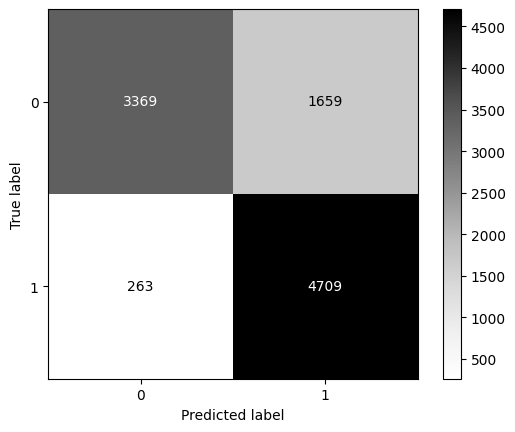

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred,cmap='Greys');

**Now imagine you are trying to extract the embedding layer that was just trained.**

In [90]:
extracted_embeddings = model.layers[0].get_weights()[0]

In [91]:
extracted_embeddings.shape

(20000, 100)

**Let us look at one embedding for the word king**  

In [92]:
word_index['king']

813

In [93]:
extracted_embeddings[786]

array([-1.14881275e-02, -4.41592261e-02, -4.85331053e-03, -1.27452053e-02,
        1.48207322e-02, -2.81493943e-02, -2.04038695e-02,  7.28135882e-03,
        2.50659920e-02, -2.94143893e-02, -4.46013398e-02, -3.36550735e-02,
        1.63620058e-02,  4.67801951e-02, -1.06137553e-02, -3.36213186e-02,
       -2.73865443e-02, -3.96513101e-03, -3.63592319e-02,  4.53439988e-02,
       -4.48018685e-02,  2.49947738e-02,  2.71193534e-02, -9.99597739e-03,
        1.36841452e-02,  3.64869200e-02,  1.31667387e-02, -5.02903908e-02,
       -2.67941821e-02,  2.96925963e-03,  7.30096130e-04,  4.84319851e-02,
       -4.81315553e-02, -1.93552990e-02, -3.17387953e-02,  6.65677013e-03,
        2.90846545e-02, -3.07342205e-02,  3.25024426e-02,  3.11762001e-02,
       -4.29074951e-02, -4.49494086e-02, -3.50158736e-02, -1.94754936e-02,
        4.34485637e-02,  2.75417510e-02,  3.46044451e-02,  3.01583093e-02,
       -8.66759475e-03,  1.49796726e-02,  2.23229709e-03, -2.59099063e-03,
       -1.17797805e-02,  

**Predicting for a new review**

In [94]:
new_review = 'The movie is awful garbage hopeless useless no good'
sequenced_review = tokenizer.texts_to_sequences([new_review])
sequenced_review

[[2, 18, 7, 376, 1220, 4797, 3054, 55, 50]]

In [95]:
padded_review = pad_sequences(sequenced_review, maxlen = maxlen)
predicted_class = model.predict(padded_review)
predicted_class

1/1 [==============================] - 0s 32ms/step


array([[0.25863147]], dtype=float32)

In [96]:
pred = (predicted_class>0.5)*1
int(pred)

C:\Users\user\AppData\Local\Temp\ipykernel_23804\2909965089.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(pred)


0

In [97]:
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [98]:
dict(list(enumerate(le.classes_)))[int(pred)]

C:\Users\user\AppData\Local\Temp\ipykernel_23804\2478111763.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dict(list(enumerate(le.classes_)))[int(pred)]


'negative'

***
### Movie Review Classification Using Pre-trained Glove Embeddings

**First, load the Glove embeddings**

In [99]:
pwd

'C:\\Users\\user\\Google Drive\\jupyter'

In [100]:
embeddings_index = {}

f=open(r"C:\Users\user\Google Drive\glove.6B\glove.6B.100d.txt", encoding="utf8") # For personal machine
# f=open(r"/home/instructor/shared/glove.6B.100d.txt", encoding="utf8") # For Jupyterhub at NYU
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s words and corresponding vectors' % len(embeddings_index))
vocab_size = len(embeddings_index)

Found 400000 words and corresponding vectors


In [101]:
# Print the embeddings_index (if needed)

# embeddings_index

In [102]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [103]:
len(embeddings_index.get('security'))

100

In [104]:
print(embeddings_index.get('th13e'))

None


In [105]:
y_test

array([0, 1, 0, ..., 1, 1, 0])

In [106]:
list(embeddings_index.keys())[3]

'of'

In [107]:
vocab_size

400000

In [108]:
# Create the embedding matrix based on Glove
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for i, word in enumerate(list(embeddings_index.keys())):
    # print(word,i)
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            

In [109]:
embedding_matrix.shape

(400000, 100)

In [110]:
embedding_matrix[0]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

At this point the `embedding_matrix` has one row per word in the vocabulary.  Each row has the vector for that word, picked from glove.  Because it is an np.array, it has no row or column names. The order of the words in the rows is the same as the order of words in the dict embeddings_index.  
  
We will feed this embedding matrix as weights to the embedding layer.  
  
**Build the model:**    

In [111]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout


In [112]:
# let us use pretrained Glove embeddings

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim,
                    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                    trainable=False,mask_zero=True )) # Note that vocab_size=20000 (vocab size), embedding_dim = 100 (100 dense vector for each word from Glove), maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32, name='LSTM_Layer'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         40000000  
                                                                 
 LSTM_Layer (LSTM)           (None, 32)                17024     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 40017057 (152.65 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 40000000 (152.59 MB)
_________________________________________________________________


In [113]:
# Takes 30 minutes to train

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=1024, validation_split=0.2, callbacks=[callback])


Epoch 1/4
32/32 [==============================] - 155s 5s/step - loss: 0.6956 - acc: 0.5199 - val_loss: 0.6848 - val_acc: 0.5543
Epoch 2/4
32/32 [==============================] - 151s 5s/step - loss: 0.6805 - acc: 0.5609 - val_loss: 0.6720 - val_acc: 0.5863
Epoch 3/4
32/32 [==============================] - 158s 5s/step - loss: 0.6707 - acc: 0.5847 - val_loss: 0.6953 - val_acc: 0.5361
Epoch 4/4
32/32 [==============================] - 163s 5s/step - loss: 0.6635 - acc: 0.5954 - val_loss: 0.6638 - val_acc: 0.5957


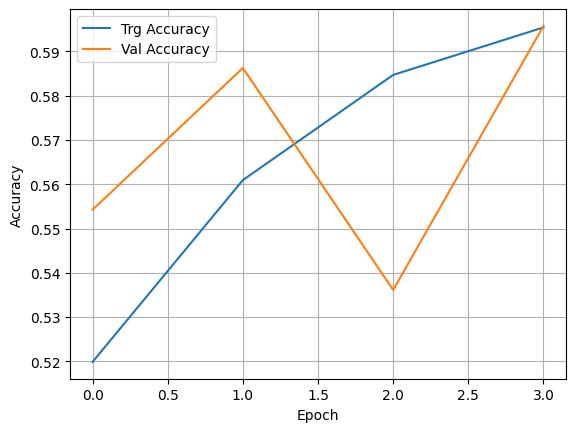

In [114]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [115]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 25s 74ms/step


              precision    recall  f1-score   support

           0       0.57      0.86      0.68      5028
           1       0.70      0.35      0.47      4972

    accuracy                           0.60     10000
   macro avg       0.64      0.60      0.57     10000
weighted avg       0.64      0.60      0.58     10000



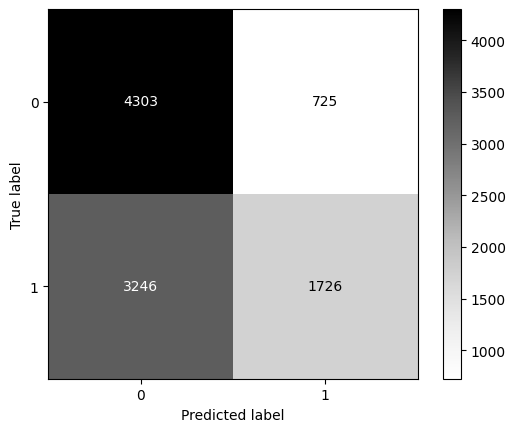

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred,cmap='Greys');

***
**CAREFUL WHEN RUNNING ON JUPYTERHUB!!!**
Jupyterhub may crash, or will not have the storage space to store the pretrained models.  If you wish to test this out, run it on your own machine.

## Word2Vec
### Using pre-trained embeddings

You can list all the different types of pre-trained embeddings you can download from Gensim

In [117]:
# import os
# os.environ['GENSIM_DATA_DIR'] = '/home/instructor/shared/gensim'

In [300]:
# Source: https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html

import gensim.downloader as api
info = api.info()

for model_name, model_data in sorted(info['models'].items()):
    print(
        '%s (%d records): %s' % (
            model_name,
            model_data.get('num_records', -1),
            model_data['description'][:40] + '...',
        )
    )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 records): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 records): Pre-trai

In [302]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-50')

In [305]:
wv.similarity('ship', 'marshmallow')

-0.046069

In [306]:
wv.similarity('up', 'down')

0.9523452

In [319]:
wv.most_similar(positive=['plot'], topn=5)

[('plots', 0.8182128071784973),
 ('plotting', 0.7718315124511719),
 ('plotted', 0.7407090067863464),
 ('conspiracy', 0.7254624366760254),
 ('secret', 0.6929571032524109)]

In [310]:
# king - queen = princess - prince
# king = + queen + princess - prince
wv.most_similar(positive=['queen', 'prince'], negative = ['princess'], topn=5)

[('king', 0.8574749827384949),
 ('patron', 0.7256798148155212),
 ('crown', 0.7167519330978394),
 ('throne', 0.7129824161529541),
 ('edward', 0.7081639170646667)]

In [312]:
wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air'])

'land'

In [242]:
wv['car'].shape

(50,)

In [313]:
wv['car']

array([ 0.47685 , -0.084552,  1.4641  ,  0.047017,  0.14686 ,  0.5082  ,
       -1.2228  , -0.22607 ,  0.19306 , -0.29756 ,  0.20599 , -0.71284 ,
       -1.6288  ,  0.17096 ,  0.74797 , -0.061943, -0.65766 ,  1.3786  ,
       -0.68043 , -1.7551  ,  0.58319 ,  0.25157 , -1.2114  ,  0.81343 ,
        0.094825, -1.6819  , -0.64498 ,  0.6322  ,  1.1211  ,  0.16112 ,
        2.5379  ,  0.24852 , -0.26816 ,  0.32818 ,  1.2916  ,  0.23548 ,
        0.61465 , -0.1344  , -0.13237 ,  0.27398 , -0.11821 ,  0.1354  ,
        0.074306, -0.61951 ,  0.45472 , -0.30318 , -0.21883 , -0.56054 ,
        1.1177  , -0.36595 ], dtype=float32)

In [127]:
# # Create the embedding matrix based on Word2Vec
# # The code below is to be used if Word2Vec based embedding is to be applied
# embedding_dim = 300
# embedding_matrix = np.zeros((vocab_size, embedding_dim))
# for word, i in word_index.items():
#     if i < vocab_size:
#         try:
#             embedding_vector = wv[word]
#         except:
#             pass
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector
 

### Train your own Word2Vec model

Source: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [314]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [315]:
text = X.str.split()
text

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production., <br, /><br...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there's, a, family, where, a, litt...
4        [Petter, Mattei's, "Love, in, the, Time, of, M...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I'm, going, to, have, to, disagree, with, the...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [316]:
%%time
import gensim.models
# Next, you train the model.  Lots of parameters available.  The default model type
# is CBOW, which you can change to SG by setting sg=1

model = gensim.models.Word2Vec(sentences=text, vector_size=100)

CPU times: total: 18.6 s
Wall time: 24.8 s


In [317]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/76833 is the
word #1/76833 is a
word #2/76833 is and
word #3/76833 is of
word #4/76833 is to
word #5/76833 is is
word #6/76833 is in
word #7/76833 is I
word #8/76833 is that
word #9/76833 is this


In [318]:
model.wv.most_similar(positive=['plot'], topn=5)

[('storyline', 0.8623475432395935),
 ('story', 0.802622377872467),
 ('plot,', 0.801565408706665),
 ('premise', 0.7574442625045776),
 ('script', 0.7303113341331482)]

In [133]:
model.wv.most_similar(positive=['picture'], topn=5)

[('film', 0.7727681398391724),
 ('movie', 0.7152172923088074),
 ('picture,', 0.6822035908699036),
 ('film,', 0.6663559675216675),
 ('picture.', 0.6313234567642212)]

In [134]:
model.wv.doesnt_match(['violence', 'comedy', 'hollywood', 'action', 'tragedy', 'mystery'])

'hollywood'

In [135]:
model.wv['car']

array([ 1.9184788 , -0.39828682, -3.0497658 ,  1.162363  ,  1.3929547 ,
        0.73242277,  0.95298696,  0.6758191 ,  1.3006241 , -1.6236212 ,
        3.9134579 , -1.2583504 , -2.0008836 , -0.86899066, -0.63415515,
       -1.4440541 ,  1.8872882 ,  0.84577435,  2.1984234 , -1.7293    ,
       -0.11701463, -0.4169316 , -0.7939858 ,  1.0183135 ,  0.16227342,
       -2.2215946 , -0.70099163,  0.43473026, -1.6678154 ,  2.121353  ,
        0.19150172, -0.47383904, -1.6977563 , -2.3342447 ,  0.06500984,
        0.7027349 ,  2.4686372 ,  1.6673396 ,  1.0421041 ,  0.92360365,
       -1.2118206 , -0.49564028, -0.4385476 ,  1.6923317 , -0.36909676,
       -2.3004282 , -2.4018247 ,  0.5466857 ,  1.1344895 , -0.76052487,
       -1.851937  , -0.887899  , -0.90922797, -0.89403564,  0.31427276,
       -1.7317183 , -1.9672406 , -0.6664012 ,  2.4840136 ,  0.9176966 ,
       -1.235118  , -1.81105   ,  0.04874192, -0.43327668, -2.336604  ,
        1.0734081 ,  1.7877102 ,  0.7888886 , -0.8859155 ,  0.47

In [136]:
# model.wv.key_to_index 

list(model.wv.key_to_index.items())[:20]

[('the', 0),
 ('a', 1),
 ('and', 2),
 ('of', 3),
 ('to', 4),
 ('is', 5),
 ('in', 6),
 ('I', 7),
 ('that', 8),
 ('this', 9),
 ('it', 10),
 ('/><br', 11),
 ('was', 12),
 ('as', 13),
 ('with', 14),
 ('for', 15),
 ('The', 16),
 ('but', 17),
 ('on', 18),
 ('movie', 19)]

In [137]:
model.wv.index_to_key[:20]

['the',
 'a',
 'and',
 'of',
 'to',
 'is',
 'in',
 'I',
 'that',
 'this',
 'it',
 '/><br',
 'was',
 'as',
 'with',
 'for',
 'The',
 'but',
 'on',
 'movie']

### Identify text that is similar

We will calculate the similarity between vectors to identify the most similar reviews.

Before we do it for everything, let us pick two random reviews and compute the similarity between them.

To make things simpler, first let us reduce the size of our dataset to 5,000 reviews (instead of 50,000)

In [138]:
df = df.sample(5000) # We limit, for illustration, to 1000 random reviews

In [139]:
df.review.iloc[2]

'Superman II - The Richard Donner Cut should be a fan\'s dream come true. At long last, footage only seen in photos and scenes that only existed on the printed page would finally come to life. A director that was unable to complete his vision would have the opportunity to have his vision restored. It seems like a winning situation. And then you start watching this assembly of footage and you realize this "esoteric dream" is a very real nightmare of sloppiness and incompetence. While it\'s entirely possible that no movie could compete with the finished perfect version each of us has imagined over the years it really should have been a thrill to finally see this project. And it is only a very few times.<br /><br />You know things are shaky when the very first bit of text on screen looks like home brew computer graphics. But then we start seeing new footage (alternates from Superman - The Movie for the trial) and that first bit of hesitation fades away. Hey, this is pretty neat! Things ar

In [140]:
df.review.iloc[20]

'Family Guy is THE best show on TV. EVER. It has achieved great things that no other animated sitcom, or any show, has even come close to achieving.<br /><br />In terms of animated sitcoms, this era should be referred to as "The Era of Animated Sitcoms" because there are so many of them, and almost every one of them imaginable is being released on DVD. There are some good ones (i.e. South Park, Futurama, and The Simpsons). Every animated sitcom has its own style/technique of creating humor. For instance, Futurama is funny because it always comments or acts on what just happened with a touch of humor. The Simpsons is also a great show because it uses the same comedic technique and style that Futurama does, but The Simpsons deserves the credit for it since it was on the air way before Futurama and still remains on the air using the technique. South Park, in my mind, is the funniest show next to Family Guy, because it uses a smart blend of vulgarity and silliness as it\'s technique of cre

In [143]:
# We take the above reviews and split by word, and put them in a list
# Word2vec will need these as a list

first = [x for x in df.review.iloc[2].split() if x in model.wv.key_to_index]
second = [x for x in df.review.iloc[20].split() if x in model.wv.key_to_index]

In [144]:
print(first)

['Superman', 'II', '-', 'The', 'Richard', 'Donner', 'Cut', 'should', 'be', 'a', "fan's", 'dream', 'come', 'true.', 'At', 'long', 'last,', 'footage', 'only', 'seen', 'in', 'photos', 'and', 'scenes', 'that', 'only', 'existed', 'on', 'the', 'printed', 'page', 'would', 'finally', 'come', 'to', 'life.', 'A', 'director', 'that', 'was', 'unable', 'to', 'complete', 'his', 'vision', 'would', 'have', 'the', 'opportunity', 'to', 'have', 'his', 'vision', 'restored.', 'It', 'seems', 'like', 'a', 'winning', 'situation.', 'And', 'then', 'you', 'start', 'watching', 'this', 'assembly', 'of', 'footage', 'and', 'you', 'realize', 'this', 'dream"', 'is', 'a', 'very', 'real', 'nightmare', 'of', 'sloppiness', 'and', 'incompetence.', 'While', "it's", 'entirely', 'possible', 'that', 'no', 'movie', 'could', 'compete', 'with', 'the', 'finished', 'perfect', 'version', 'each', 'of', 'us', 'has', 'imagined', 'over', 'the', 'years', 'it', 'really', 'should', 'have', 'been', 'a', 'thrill', 'to', 'finally', 'see', 'th

In [145]:
print(second)

['Family', 'Guy', 'is', 'THE', 'best', 'show', 'on', 'TV.', 'EVER.', 'It', 'has', 'achieved', 'great', 'things', 'that', 'no', 'other', 'animated', 'sitcom,', 'or', 'any', 'show,', 'has', 'even', 'come', 'close', 'to', '/><br', '/>In', 'terms', 'of', 'animated', 'sitcoms,', 'this', 'era', 'should', 'be', 'referred', 'to', 'as', '"The', 'Era', 'of', 'Animated', 'because', 'there', 'are', 'so', 'many', 'of', 'them,', 'and', 'almost', 'every', 'one', 'of', 'them', 'imaginable', 'is', 'being', 'released', 'on', 'DVD.', 'There', 'are', 'some', 'good', 'ones', '(i.e.', 'South', 'Park,', 'and', 'The', 'Every', 'animated', 'sitcom', 'has', 'its', 'own', 'of', 'creating', 'humor.', 'For', 'instance,', 'Futurama', 'is', 'funny', 'because', 'it', 'always', 'comments', 'or', 'acts', 'on', 'what', 'just', 'happened', 'with', 'a', 'touch', 'of', 'humor.', 'The', 'Simpsons', 'is', 'also', 'a', 'great', 'show', 'because', 'it', 'uses', 'the', 'same', 'comedic', 'technique', 'and', 'style', 'that', 'Fu

In [146]:
# Get similarity score using n_similarity
# The default distance measure is cosine similarity

model.wv.n_similarity(first, second)

0.95897233

In [147]:
# For every word, we can get a vector

model.wv.get_vector('If')

array([-0.55869955, -1.4692305 , -3.839716  ,  3.6671798 ,  1.5076164 ,
        2.4908245 ,  2.212453  , -0.32262865, -3.5175855 ,  0.8893567 ,
        0.7034579 , -1.5672586 ,  2.4442415 , -0.06208806,  0.42273512,
        1.9995304 ,  0.08405589, -0.4525946 ,  3.0106468 ,  2.6074355 ,
        2.1523032 ,  2.4852414 ,  5.014252  , -2.9935677 , -1.8034331 ,
       -0.4719229 , -1.9740726 , -1.9200066 , -1.3301398 ,  1.3942409 ,
       -0.17424592, -2.6663694 , -2.3387885 , -0.85185564,  1.9187782 ,
        2.034264  , -3.8719244 ,  0.57335144, -0.3109584 , -2.4004536 ,
       -1.2109379 , -2.1351192 ,  0.83214825,  3.696504  , -1.1923813 ,
        1.0552515 , -2.0124133 , -3.7445135 , -2.9193707 ,  0.09479293,
        1.2588173 ,  1.9877659 , -1.478431  ,  1.0375535 ,  2.1230133 ,
       -2.398505  ,  0.27243504,  1.0784017 , -1.6489098 , -1.0229118 ,
        0.46698073, -1.8441215 , -1.6177284 ,  0.9244559 , -1.0874454 ,
        0.0598713 , -0.63110566, -0.7954892 ,  5.756124  ,  4.11

In [148]:
# For every sentence, we can get a combined vector 

model.wv.get_mean_vector(first, pre_normalize = False, post_normalize = True)

array([-0.12716345, -0.02062539, -0.00854396,  0.14062193, -0.0527816 ,
        0.08582281,  0.00973223, -0.07227147,  0.17143776, -0.13830668,
        0.14255404,  0.09067949, -0.01388476,  0.04144285, -0.03032569,
        0.05225335,  0.0405279 ,  0.01091069,  0.05830484,  0.04024252,
       -0.07572316, -0.02828113,  0.01153243,  0.03350943, -0.1821331 ,
       -0.24526954, -0.12275691,  0.23601706,  0.14562547, -0.0229406 ,
       -0.06358591, -0.01652244, -0.04840493,  0.08687648,  0.00078861,
        0.04282732,  0.0958022 , -0.18391198,  0.02641283, -0.03540939,
       -0.0932271 ,  0.17250837, -0.11608617,  0.13774149, -0.02228819,
        0.01776282,  0.00656082,  0.12293629,  0.00712244,  0.03100933,
        0.10573095, -0.06185889,  0.1304919 , -0.02661016,  0.10376952,
        0.11578053, -0.08895049,  0.1532005 ,  0.02578054, -0.05149119,
       -0.0839761 , -0.02228104, -0.02242619, -0.04938238, -0.07228516,
       -0.06397878,  0.13402377,  0.04668695, -0.07856713,  0.04

In [149]:
# Get a single mean pooled vector for an entire review

first_vector = model.wv.get_mean_vector(first, pre_normalize = False, post_normalize = True)
second_vector = model.wv.get_mean_vector(second, pre_normalize = False, post_normalize = True)

In [150]:
# Cosine similarity is just the dot product of the two vectors

np.dot(first_vector, second_vector)

0.95897233

In [151]:
# We can get the same thing manually too

x = np.empty([0,100])
for word in first:
    x = np.vstack([x, model.wv.get_vector(word)])
x.mean(axis = 0)/ np.linalg.norm(x.mean(axis = 0), 2) # L2 normalization

array([-0.12716343, -0.0206254 , -0.00854396,  0.14062187, -0.05278157,
        0.08582283,  0.00973223, -0.07227148,  0.17143757, -0.13830671,
        0.14255402,  0.09067945, -0.01388475,  0.04144285, -0.03032572,
        0.05225333,  0.04052792,  0.01091069,  0.05830481,  0.04024248,
       -0.07572312, -0.02828115,  0.01153245,  0.03350941, -0.18213308,
       -0.24526969, -0.12275699,  0.23601698,  0.14562561, -0.02294059,
       -0.06358584, -0.01652245, -0.04840496,  0.08687641,  0.00078861,
        0.04282735,  0.09580223, -0.18391194,  0.02641277, -0.03540941,
       -0.09322698,  0.17250838, -0.11608612,  0.13774138, -0.02228817,
        0.01776283,  0.00656082,  0.12293623,  0.00712246,  0.03100932,
        0.10573103, -0.06185887,  0.13049181, -0.02661013,  0.10376957,
        0.11578052, -0.08895046,  0.15320052,  0.02578053, -0.05149118,
       -0.08397604, -0.022281  , -0.02242619, -0.04938242, -0.07228518,
       -0.06397877,  0.13402369,  0.04668691, -0.07856703,  0.04

**Next, we calculate the cosine similarity matrix between all the reviews**

In [152]:
# We can calculate cosine similarity between all reviews
# To do that, let us first convert each review to a vector
# We loop through each review, and get_mean_vector

vector_df = np.empty([0,100])
for review in df.review:
    y = [x for x in review.split() if x in model.wv.key_to_index]
    vector_df = np.vstack([vector_df, model.wv.get_mean_vector(y)])

vector_df.shape



(5000, 100)

In [153]:
from sklearn.metrics.pairwise import cosine_similarity

distance_matrix = cosine_similarity(vector_df)

In [154]:
dist_df = pd.DataFrame(distance_matrix)
dist_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.855123,0.922918,0.423008,0.899430,0.858989,0.795896,0.883622,0.952199,0.839977,...,0.813545,0.953344,0.938356,0.842115,0.789637,0.836846,0.865776,0.826836,0.868270,0.871588
1,0.855123,1.000000,0.893347,0.198904,0.853877,0.882829,0.560948,0.847091,0.863077,0.796359,...,0.861835,0.877986,0.919517,0.849557,0.802326,0.813974,0.873611,0.754607,0.789129,0.803496
2,0.922918,0.893347,1.000000,0.420655,0.894186,0.886675,0.715896,0.895175,0.951744,0.912323,...,0.888537,0.933751,0.950875,0.913076,0.829454,0.855096,0.919728,0.862565,0.890805,0.908361
3,0.423008,0.198904,0.420655,1.000000,0.329058,0.418896,0.590485,0.405583,0.490728,0.657338,...,0.535865,0.423738,0.363563,0.497711,0.159603,0.267649,0.404381,0.546593,0.642932,0.389919
4,0.899430,0.853877,0.894186,0.329058,1.000000,0.886361,0.678750,0.817624,0.899273,0.814785,...,0.827951,0.886567,0.946048,0.809585,0.770268,0.795143,0.865566,0.727218,0.866923,0.818337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.836846,0.813974,0.855096,0.267649,0.795143,0.765202,0.546662,0.865101,0.827154,0.769002,...,0.753093,0.865195,0.845968,0.775160,0.894051,1.000000,0.838706,0.770322,0.729267,0.886874
4996,0.865776,0.873611,0.919728,0.404381,0.865566,0.890844,0.664619,0.838310,0.911447,0.881964,...,0.855108,0.889458,0.921997,0.858785,0.839808,0.838706,1.000000,0.829126,0.874774,0.871390
4997,0.826836,0.754607,0.862565,0.546593,0.727218,0.745486,0.667040,0.808766,0.858819,0.879314,...,0.765544,0.830223,0.795819,0.899575,0.724098,0.770322,0.829126,1.000000,0.791857,0.849818
4998,0.868270,0.789129,0.890805,0.642932,0.866923,0.894137,0.784787,0.796987,0.928311,0.931308,...,0.901757,0.864376,0.890046,0.831242,0.651182,0.729267,0.874774,0.791857,1.000000,0.791656


**The above is in a format that is difficult to read.  So we rearrange it in pairs of reviews that we can sort etc.  SInce there are 5000 reviews, there will be 5000 x 5000 = 25000000 (ie 25 million) pairs of distances.**

In [155]:
# We use stack to arrange all distances next to each other

dist_df.stack()

0     0       1.000000
      1       0.855123
      2       0.922918
      3       0.423008
      4       0.899430
                ...   
4999  4995    0.886874
      4996    0.871390
      4997    0.849818
      4998    0.791656
      4999    1.000000
Length: 25000000, dtype: float64

In [156]:
# We clean up the above an put things in a nice to read dataframe
# Once we have done that, we can sort and find similar reviews.

pairwise_distance = pd.DataFrame(dist_df.stack(),).reset_index()
pairwise_distance.columns = ['original_text_id', 'similar_text_id', 'distance']
pairwise_distance

,original_text_id,similar_text_id,distance
0,0,0,1.000000
1,0,1,0.855123
2,0,2,0.922918
3,0,3,0.423008
4,0,4,0.899430
...,...,...,...
24999995,4999,4995,0.886874
24999996,4999,4996,0.871390
24999997,4999,4997,0.849818
24999998,4999,4998,0.791656


In [157]:
df.review.iloc[0]

"So Udo Kier earned like nine bucks and free food for this so that is a victory in and of itself. <br /><br />More importantly this movie tells a very interesting tale about a group of salvage guys coming across the broken down Demeter. I should warn you, i'm gunna bounce around through this review real quick so buckle up. First thing's first. Coolio plays a guy named 187. 187 likes drugs. 187 finds a bunch of caskets on board and... now i don't know anything about the future but maybe they smuggle drugs in caskets. Not gunna say that was the craziest thing in this movie. Later on the vampire gets out of his mist filled coffin and then the real hilarity begins. First, although this movie has the word Dracula in it he is actually not in this movie. I have a theory though. Out of the blue you see the salvage crew's ship leave without them. My theory is that Dracula was on board with his retarded brother Orlock. Dracula told Orlock he'll be right back. Dracula got the hell out of this mov

In [158]:
df.review.iloc[1]

"I saw this Australian film about 10 years ago and have never forgotten it. The movie shows the horror of war in a way that Hollywood usually glosses over. The relationship between the soldiers of the two warring countries is highlighted by the differences in culture and the ultimate knowledge that in the end we are all really not different on the inside. If you can find any type of copy of this--buy or rent it. You won't be disappointed, just awed."

### kMeans clustering with Word2Vec

In [159]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [160]:
# All our review vectors are in vector_df
print(vector_df.shape)
vector_df

(5000, 100)


array([[-0.0194154 , -0.00849699, -0.01716865, ...,  0.00931155,
        -0.04845101, -0.01726792],
       [-0.02964485, -0.00451387, -0.01045034, ...,  0.01009078,
        -0.04668605, -0.04790506],
       [-0.03483551,  0.00669038, -0.00173902, ...,  0.00330564,
        -0.04493129, -0.01779377],
       ...,
       [-0.02388426,  0.02136838,  0.01908379, ..., -0.01631579,
        -0.032688  , -0.01075569],
       [-0.03504235,  0.02094905, -0.01740961, ..., -0.00156226,
        -0.04114326, -0.02317072],
       [-0.0449187 ,  0.00269873,  0.01908633, ...,  0.00136574,
        -0.04072509, -0.02149294]])

In [161]:
kmeans = KMeans(2, n_init='auto')
clusters = kmeans.fit_predict(vector_df)

In [162]:
df['clusters'] = clusters
df

,review,sentiment,clusters
6270,So Udo Kier earned like nine bucks and free fo...,positive,1
41873,I saw this Australian film about 10 years ago ...,positive,1
35224,Superman II - The Richard Donner Cut should be...,negative,1
21620,Racing enthusiast Fabian (as Tommy Callahan) s...,negative,0
42845,"Although this starts out promisingly, a woman ...",negative,1
...,...,...,...
857,I really cant think of anything good to say ab...,negative,1
6370,"The movie was excellent, save for some of the ...",positive,1
47328,God bless Randy Quaid...his leachorous Cousin ...,negative,0
1030,"The key scene in Rodrigo Garcia's ""Nine Lives""...",negative,0


In [163]:
pd.crosstab(index = df['sentiment'], 
            columns = df['clusters'], margins=True)

clusters,0,1,All
sentiment,,,
negative,932,1511,2443
positive,1393,1164,2557
All,2325,2675,5000


#### Right number of clusters
kmeans score is a measure of how far the data points are from the cluster centroids, expressed as a negative number.  The closer it is to zero, the better it is.  Of course, if we have the number of clusters equal to the number of observations, the score will be zero as each point will be its own centroid, with a sum of zero.  If we have only one cluster, we will have a large negative score.  

The ideal number of clusters is somewhere when we start getting diminished returns to adding more clusters.  We can run the kmeans algorithm for a range of cluster numbers, and compare the score.  

KMeans works by minimizing the sum of squared distance of each observation to their respective cluster center.  In an extreme situation, all observations would coincide with their centroid center, and the sum of squared distances will be zero.

With sklearn, we can get sum of squared distances of samples to their closest cluster center using _model_name.intertia__.  

The negative of inertia_ is model_name.score(x), where x is the dataset kmeans was fitted on.

##### Elbow Method  
The elbow method tracks the sum of squares against the number of clusters, and we can make a subjective judgement on the appropriate number of clusters based on graphing the sum of squares as below.  The sum of squares is calculated using the distance between cluster centers and each observation in that cluster.  As an extreme case, when the number of clusters is equal to the number of observations, the sum of squares will be zero.



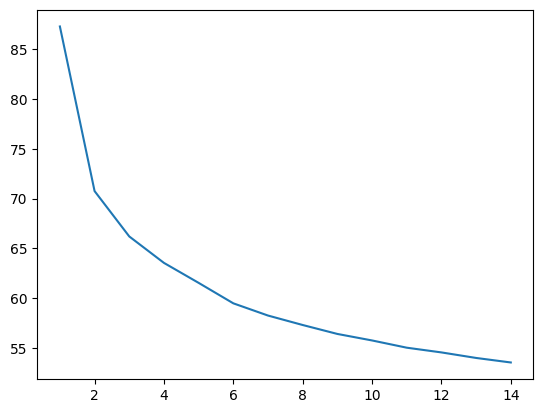

In [164]:
num_clusters = []
score = []
for cluster_count in range(1,15):
    kmeans = KMeans(cluster_count, n_init='auto')
    kmeans.fit(vector_df)
    kmeans.score(vector_df)
    num_clusters.append(cluster_count)
    # score.append(kmeans.score(x)) # score is just the negative of inertia_
    score.append(kmeans.inertia_)

plt.plot(num_clusters, score)

In [165]:
print(kmeans.score(vector_df))
kmeans.inertia_

-53.52727444796607


53.52727444796607

In [166]:
# Alternative way of listing labels for the training data
kmeans.labels_

array([8, 4, 4, ..., 7, 1, 6])

##### Silhouette Plot  
The silhouette plot is a measure of how close each point in one cluster is to points in the neighboring clusters.  It provides a visual way to assess parameters such as the number of clusters visually.  It does so using the silhouette coefficient.

Silhouette coefficient - This measure has a range of [-1, 1].  Higher the score the better, so +1 is the best result.

The silhouette coefficient is calculated individually for every observation in a cluster as follows:  (b - a) / max(a, b). 'b' is the distance between a sample and the nearest cluster that the sample is not a part of.  'a' is the distance between the sample and the cluster it is a part of.  One would expect b - a to be a positive number, but if it is not, then likely the point is misclassified.

`sklearn.metrics.silhouette_samples(X)` - gives the silhouette coefficient for every point in X.  
`sklearn.metrics.silhouette_score(X)` - gives mean of the above.

The silhouette plot gives the mean (ie silhouette_score) as a red vertical line for the entire dataset for all clusters.  Then each cluster is presented as a sideways histogram of the distances of each of the datapoints.  The fatter the representation of a cluster, the more datapoints are included in that cluster. 

Negative points on the histogram indicate misclassifications that may be difficult to correct as moving them changes the centroid center.



For n_clusters = 2 The average silhouette_score is : 0.1657680778925936
For n_clusters = 3 The average silhouette_score is : 0.09577679071788392
For n_clusters = 4 The average silhouette_score is : 0.0770754372934435
For n_clusters = 5 The average silhouette_score is : 0.07163005341517714
For n_clusters = 6 The average silhouette_score is : 0.06783325007157791


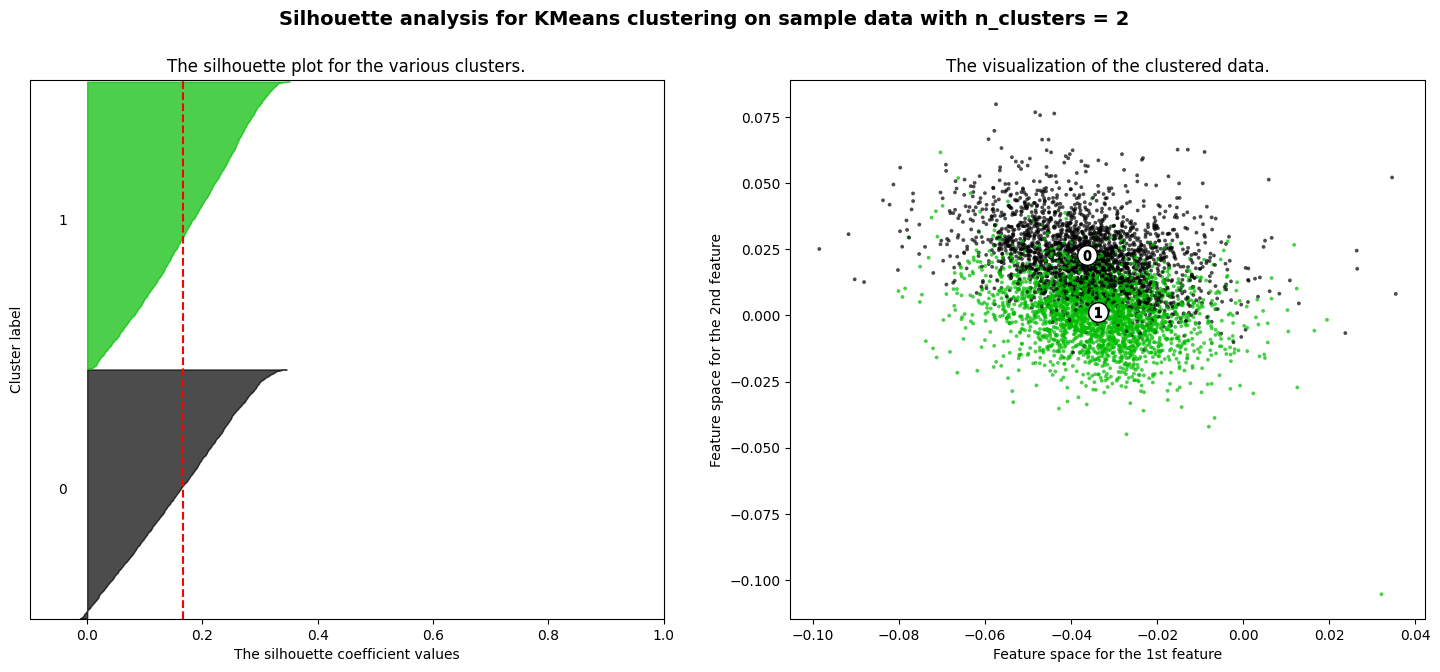

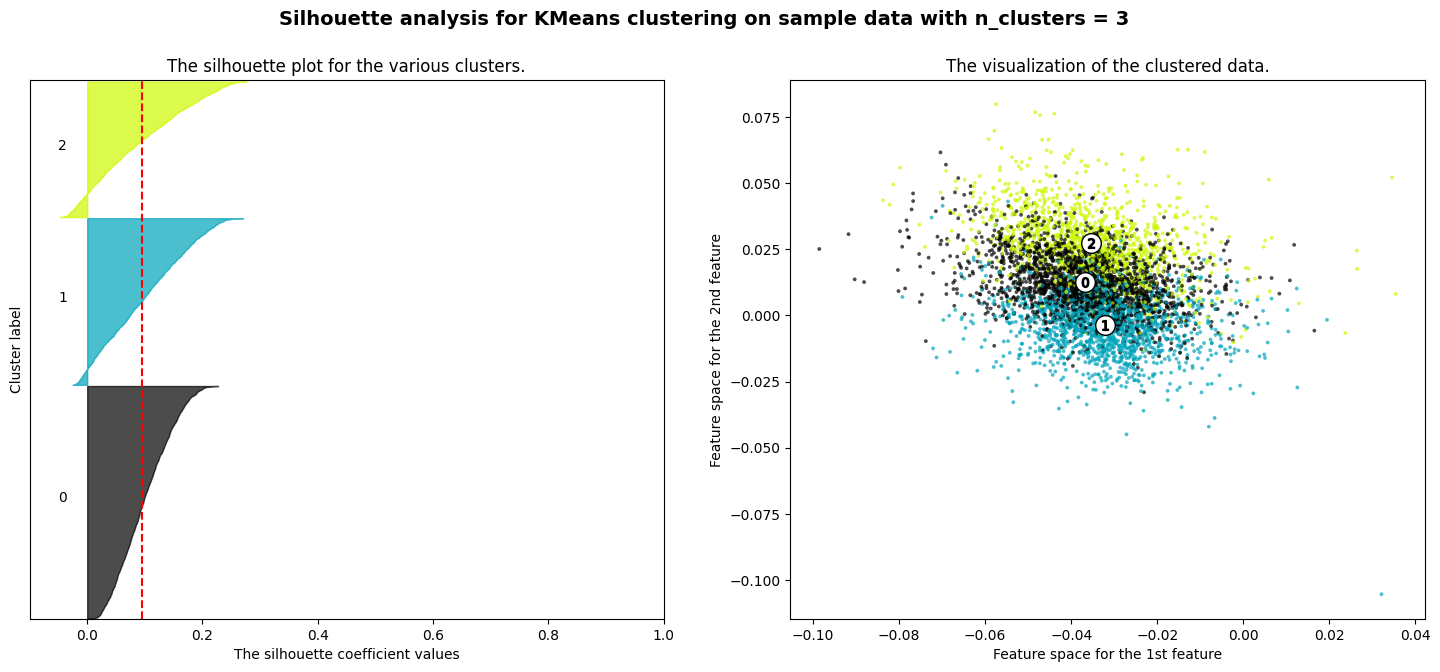

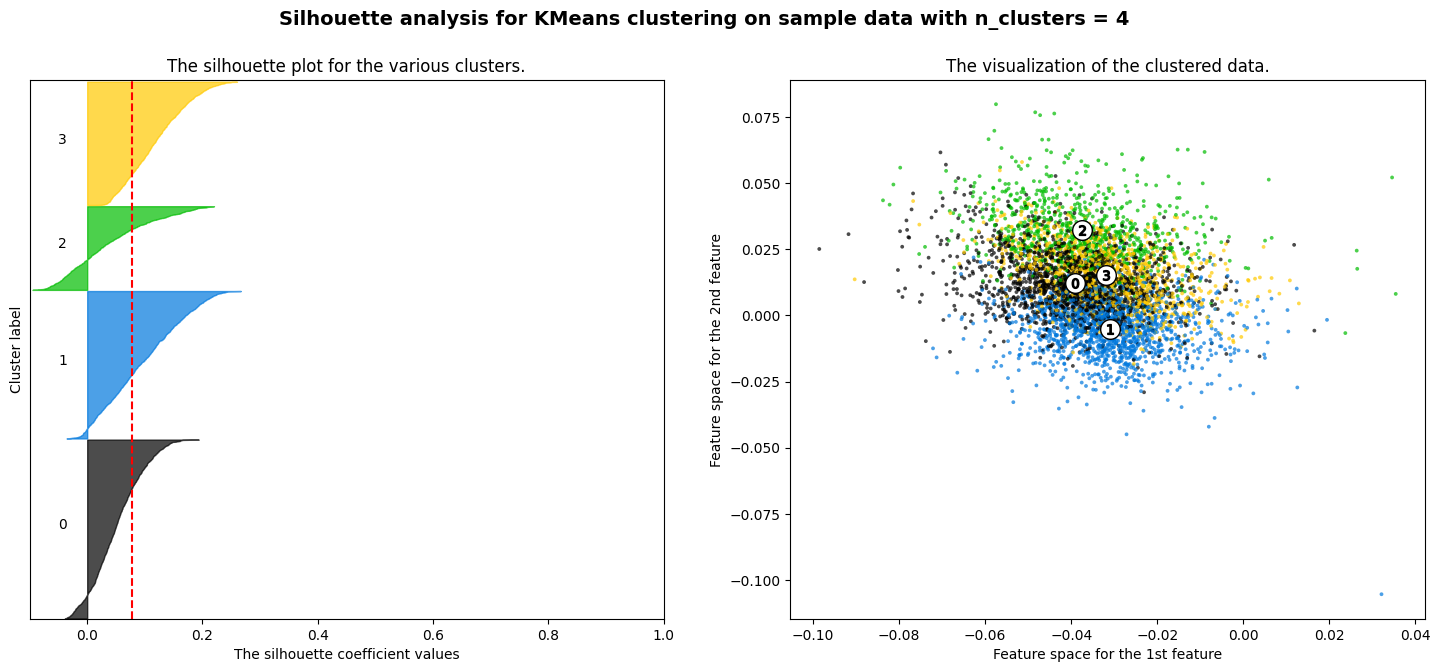

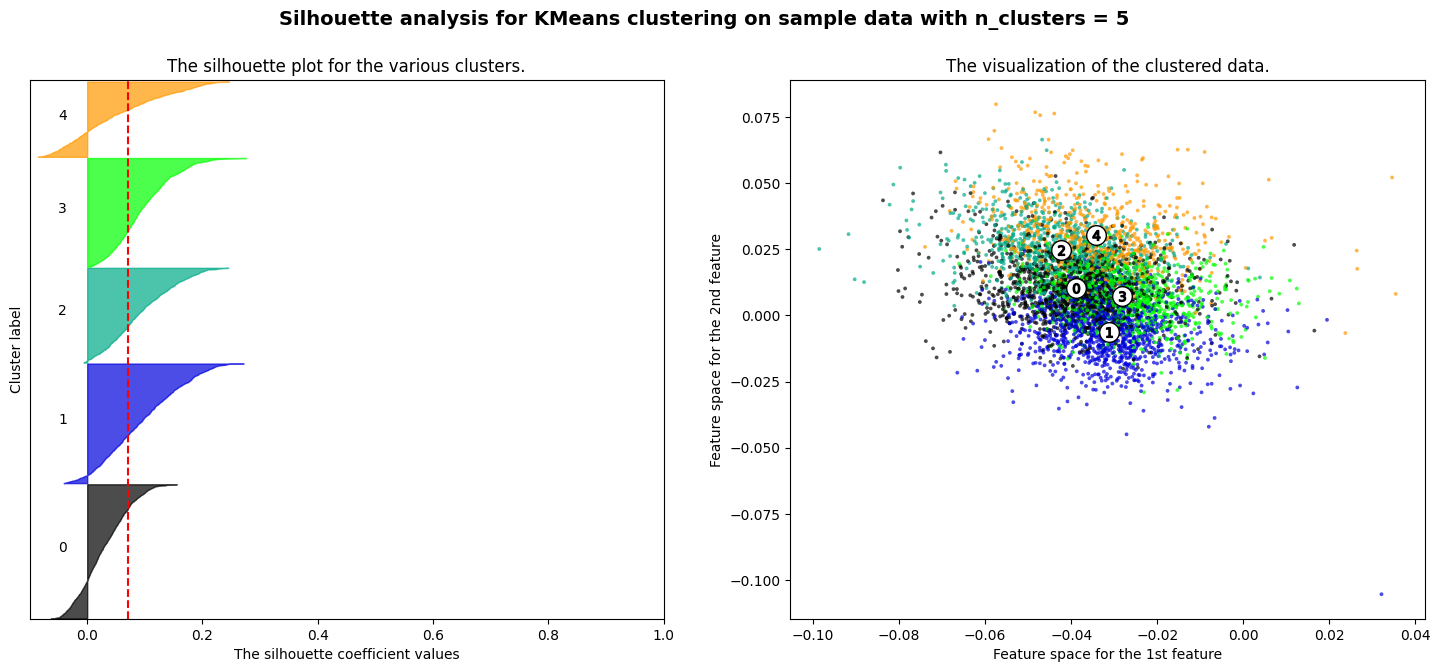

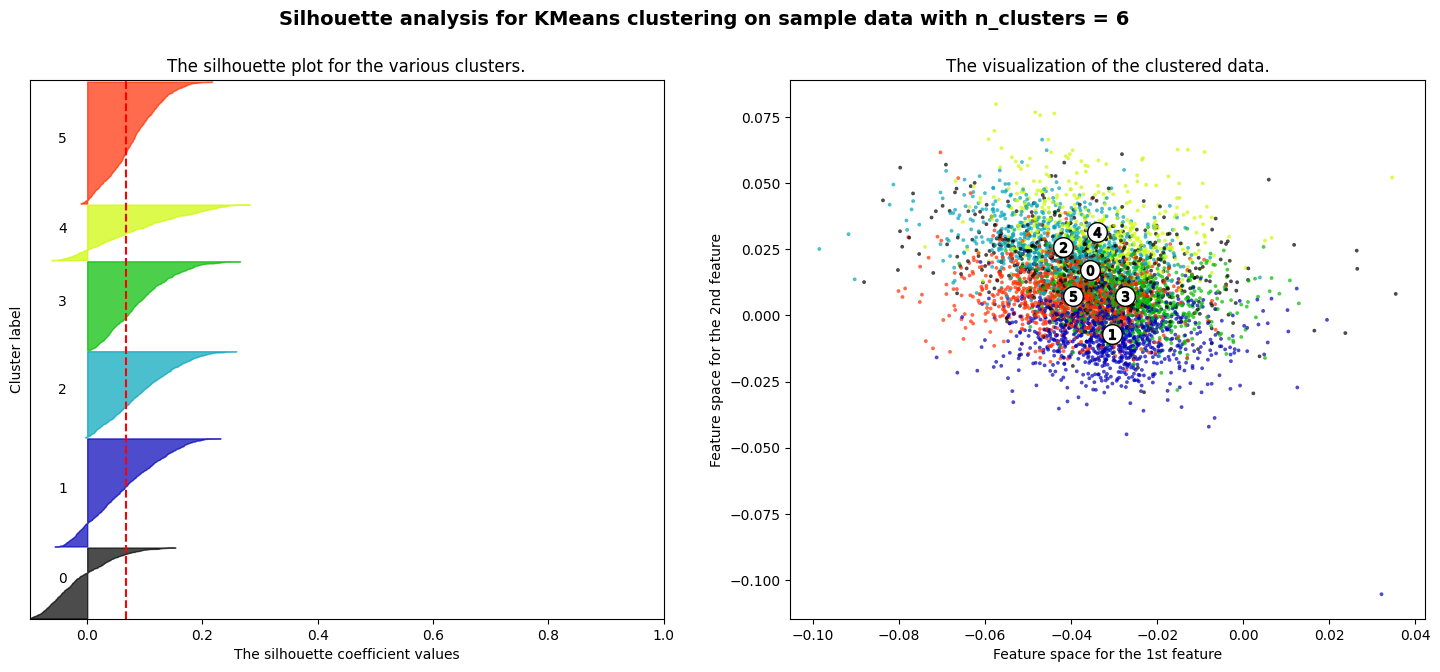

In [167]:
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

x= vector_df

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        np.array(x)[:, 0], np.array(x)[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Classification using Word2Vec

In [168]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [169]:
df.review.str.split()

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production., <br, /><br...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there's, a, family, where, a, litt...
4        [Petter, Mattei's, "Love, in, the, Time, of, M...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I'm, going, to, have, to, disagree, with, the...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [170]:
%%time
import gensim.models
# Next, you train the model.  Lots of parameters available.  The default model type
# is CBOW, which you can change to SG by setting sg=1

model = gensim.models.Word2Vec(sentences=df.review.str.split(), vector_size=100)

CPU times: total: 19.2 s
Wall time: 27.1 s


In [171]:
# Convert each review to a vector - these will be our 'features', or X
# We loop through each review, and get_mean_vector

vector_df = np.empty([0,100])
for review in (df.review):
    y = [x for x in review.split() if x in model.wv.key_to_index]
    vector_df = np.vstack([vector_df, model.wv.get_mean_vector(y)])

vector_df.shape



(50000, 100)

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df.sentiment.values.ravel()) # This needs a 1D array

# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector_df, y, test_size = 0.20)


In [174]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Checking accuracy on the training set

In [175]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_train)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     20000
           1       0.96      0.96      0.96     20000

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



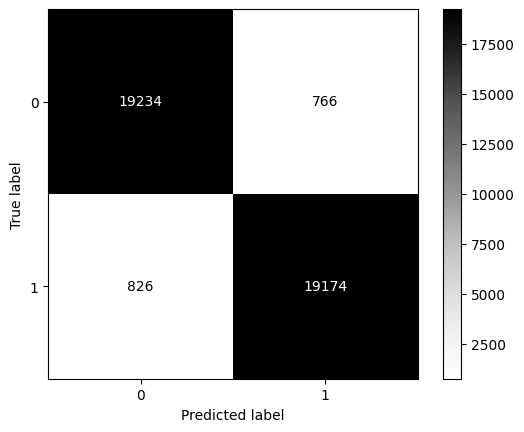

In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_train, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_train, y = y_train, cmap='Greys');

In [177]:
# We can get probability estimates for class membership using XGBoost
model_xgb.predict_proba(X_test).round(3)

array([[0.674, 0.326],
       [0.015, 0.985],
       [0.894, 0.106],
       ...,
       [0.965, 0.035],
       [0.792, 0.208],
       [0.897, 0.103]], dtype=float32)

#### Checking accuracy on the test set

In [178]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5000
           1       0.82      0.84      0.83      5000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



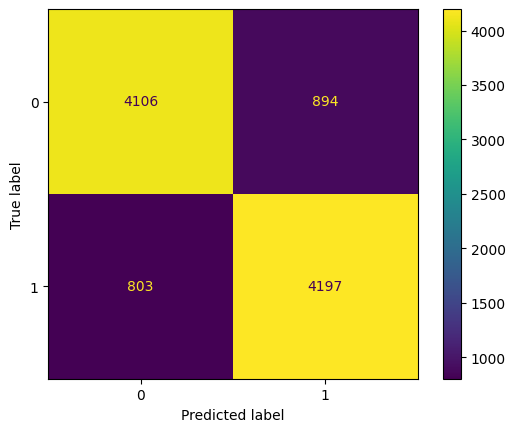

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_test, y = y_test);